# Table of Contents
1. [Scraping](#i-scraping)
2. [ATP Tour](#ii-atp-tour-dataset)
3. [Conclusion](#iii-conclusion)

---

In [1]:
import pandas as pd
import numpy as np

# Graph stuff
import networkx as nx 

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("flare")
%matplotlib inline

# Matplotlib settings
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["text.usetex"] = True
plt.rcParams.update({"text.latex.preamble": r"\usepackage{amsfonts}"})
mpl.rcParams["figure.dpi"] = 300

# Paths
EXTERNAL = "../data/external/"
PREPROCESSED = "../data/preprocessed/"

# I. Scraping 

To get useful and clean data, a big scraping steps was necessary please have a look [here](../scraper/).

In [2]:
# Load scraped data
tournaments = pd.read_csv(PREPROCESSED + "tournaments_with_dates.csv")

display(tournaments.isna().mean())

Unnamed: 0    0.000000
date          0.000000
venue         0.000000
name          0.000000
winner        0.736111
cat           0.000000
from          0.000000
to            0.000000
from_dt       0.000000
to_dt         0.000000
city          0.000000
country       0.027778
coords        0.000000
continent     0.027778
idx           0.000000
dtype: float64

There is a lot of missing values for winner, country and continent column, which is completly fine since we have scraped data from this year. This is not a problem since we will most likely not use these columns. 

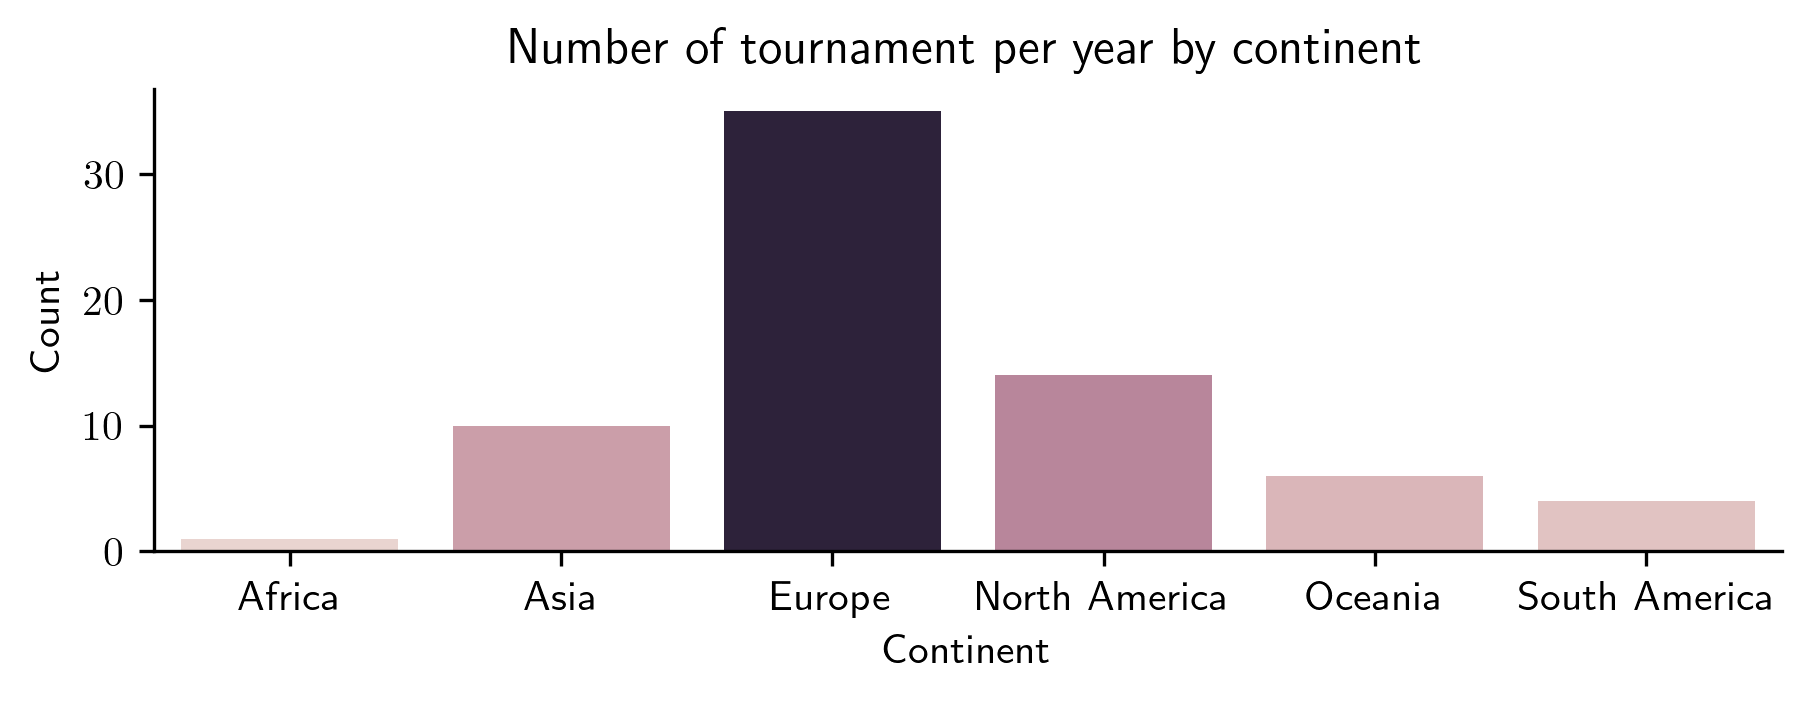

In [3]:
count_by_continent = tournaments.groupby('continent')['venue'].count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(7, 2))
sns.barplot(x=count_by_continent.continent, y=count_by_continent.venue, ax=ax, hue=count_by_continent.venue, legend=False)
ax.set_title("Number of tournament per year by continent")
ax.set_xlabel("Continent")
ax.set_ylabel("Count")
plt.show()

It's evident that Europe hosts a multitude of tournaments, indicating that more environmentally friendly travel options are feasible within the continent, thanks to the availability of various alternatives such as cars, trains, and more.

,u,v,u_continent,v_continent,u_name,v_name,u_coords,v_coords,dist,train_co2,airplane_co2,car_co2,modes,train_duration,car_duration,airplane_duration
0,2,3,Oceania,Asia,Brisbane,Hong Kong,"(-27.4689682, 153.0234991)","(22.2793278, 114.1628131)",6911.852400,0.096766,1.969878,1.340899,[<Mode.AIRPLANE: 0>],0.000000,0.000000,10.639815
1,3,4,Asia,Oceania,Hong Kong,Adelaide,"(22.2793278, 114.1628131)","(-34.9281805, 138.5999312)",6837.746539,0.095728,1.948758,1.326523,[<Mode.AIRPLANE: 0>],0.000000,0.000000,10.547183
2,3,5,Asia,Oceania,Hong Kong,Auckland,"(22.2793278, 114.1628131)","(-36.852095, 174.7631803)",9122.233811,0.127711,2.599837,1.769713,[<Mode.AIRPLANE: 0>],0.000000,0.000000,13.402792
3,4,6,Oceania,Oceania,Adelaide,Melbourne,"(-34.9281805, 138.5999312)","(-37.8142454, 144.9631732)",654.478468,0.009163,0.186526,0.126969,"[<Mode.AIRPLANE: 0>, <Mode.CAR: 2>, <Mode.TRAI...",11.223611,8.855556,2.818098
4,5,6,Oceania,Oceania,Auckland,Melbourne,"(-36.852095, 174.7631803)","(-37.8142454, 144.9631732)",2631.887428,0.036846,0.750088,0.510586,[<Mode.AIRPLANE: 0>],0.000000,0.000000,5.289859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,66,67,Europe,Europe,Paris,Metz,"(48.8534951, 2.3483915)","(49.1196964, 6.1763552)",281.703062,0.003944,0.080285,0.054650,"[<Mode.AIRPLANE: 0>, <Mode.CAR: 2>, <Mode.TRAI...",3.204722,3.431667,2.352129
96,66,68,Europe,Europe,Paris,Gijon,"(48.8534951, 2.3483915)","(43.5449422, -5.66275)",853.836094,0.011954,0.243343,0.165644,"[<Mode.AIRPLANE: 0>, <Mode.CAR: 2>, <Mode.TRAI...",17.069167,11.693333,3.067295
97,67,69,Europe,Europe,Metz,Turin,"(49.1196964, 6.1763552)","(45.0677551, 7.6824892)",464.725543,0.006506,0.132447,0.090157,"[<Mode.AIRPLANE: 0>, <Mode.CAR: 2>, <Mode.TRAI...",12.301944,7.929167,2.580907
98,68,69,Europe,Europe,Gijon,Turin,"(43.5449422, -5.66275)","(45.0677551, 7.6824892)",1076.926325,0.015077,0.306924,0.208924,"[<Mode.AIRPLANE: 0>, <Mode.CAR: 2>, <Mode.TRAI...",22.038611,14.684722,3.346158


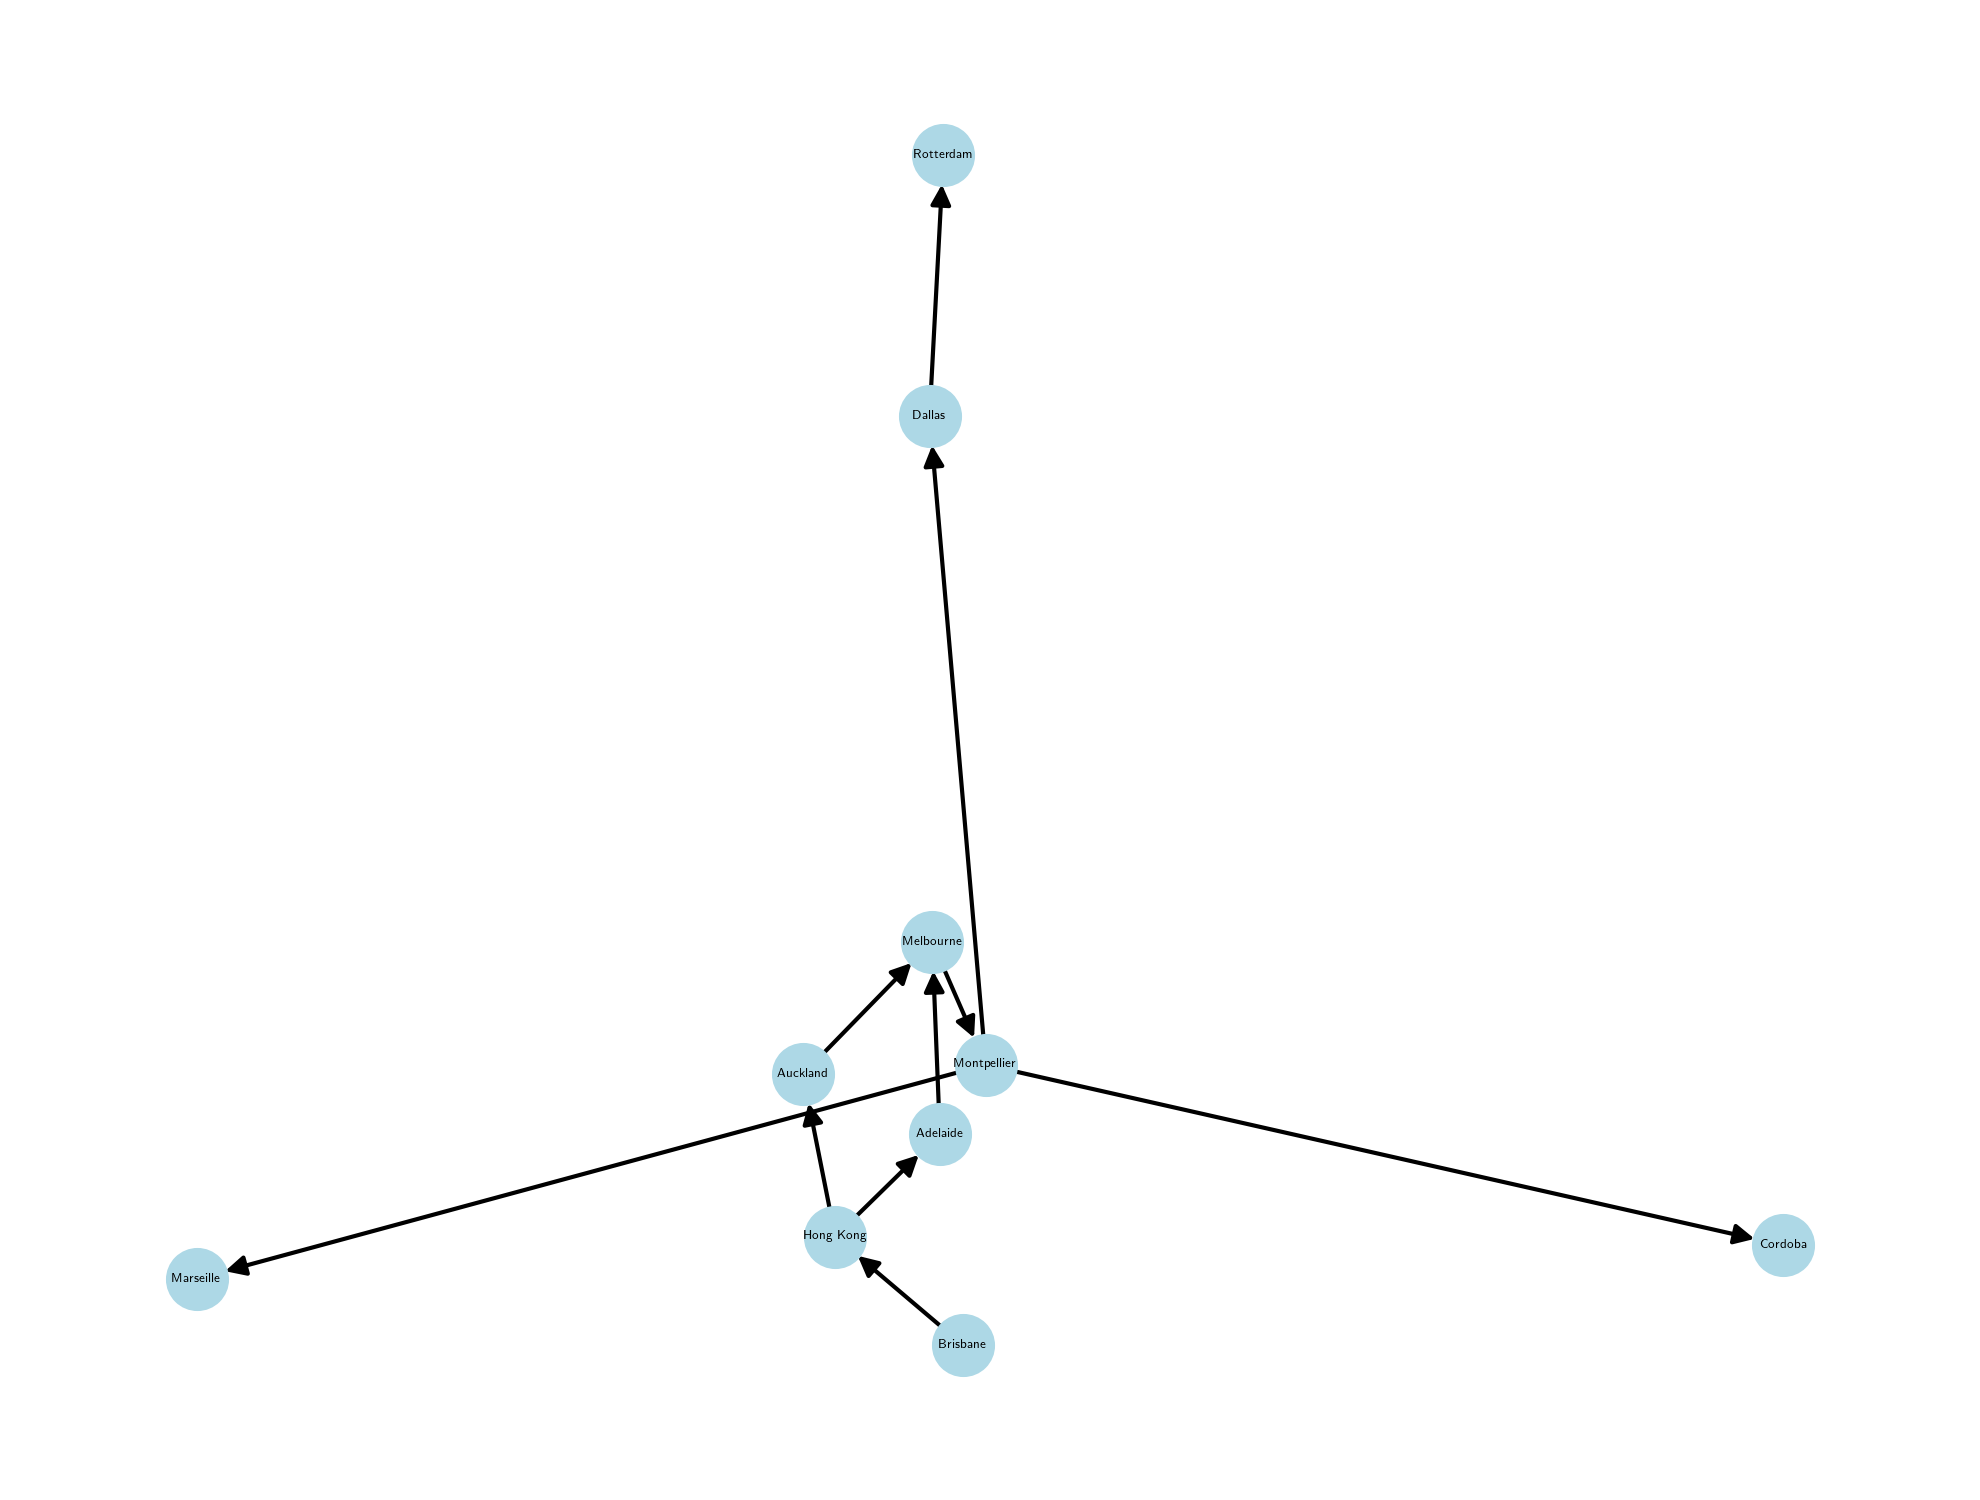

DiGraph with 10 nodes and 10 edges
{('Brisbane', 'Hong Kong'): 6911.852399770458, ('Hong Kong', 'Adelaide'): 6837.746538939788, ('Hong Kong', 'Auckland'): 9122.233811230888, ('Adelaide', 'Melbourne'): 654.4784683895019, ('Auckland', 'Melbourne'): 2631.887427881321, ('Melbourne', 'Montpellier'): 16702.47558638094, ('Montpellier', 'Dallas'): 8346.361463595347, ('Montpellier', 'Marseille'): 125.82384873442852, ('Montpellier', 'Cordoba'): 10809.575857368292, ('Dallas', 'Rotterdam'): 7918.419058099599}
{'Brisbane': 'Oceania', 'Hong Kong': 'Asia', 'Adelaide': 'Oceania', 'Auckland': 'Oceania', 'Melbourne': 'Oceania', 'Montpellier': 'Europe', 'Dallas': 'North America', 'Marseille': 'Europe', 'Cordoba': 'South America', 'Rotterdam': 'Europe'}


In [14]:
edges = pd.read_csv(PREPROCESSED + "edges_between_cities.csv", index_col=0)
tournaments = pd.read_csv(PREPROCESSED + "tournaments_without_special_events.csv")

G = nx.DiGraph()
display(edges)

# Let draw the graph for the first 10 tournaments of the season
for index, row in tournaments.head(10).iterrows():
    G.add_node(row['city'], continent=row['continent'])

for index, row in edges.head(10).iterrows(): 
    G.add_edge(row['u_name'], row['v_name'], dist=row['dist'], modes=row['modes'])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=200, font_size=3, arrows=True)
plt.show()

print(G)
print(nx.get_edge_attributes(G, "dist"))
print(nx.get_node_attributes(G, "continent"))

The goal is to leverage an algorithm to navigate a graph, pinpointing the most strategic route for the season. This route is deemed optimal when it:

- Substantially reduces CO2 emissions, promoting more eco-friendly travel.
- Retains reasonableness in travel duration, avoiding, for instance, the substitution of a 10-hour flight with a 35-hour car trip.

To achieve this, we plan to introduce a decision-making function, anticipated to resemble the following:

$$ 
\begin{align*}
g: 
\left(\begin{array}{c}
E_\mathcal{A} \\ 
E_\mathcal{T} \\ 
E_\mathcal{C} \\ 
D_\mathcal{A} \\  
D_\mathcal{T} \\ 
D_\mathcal{C}
\end{array}\right) &\longmapsto  \underset{x \in \{\mathcal{A}, \mathcal{T}, \mathcal{C}\}}{\operatorname{argmin}}
\alpha E_x + \beta D_x
\end{align*}
$$

where:

- $\mathcal{A}, \mathcal{T}, \mathcal{C}$ represent the travel modes of airplane, train, and car, respectively.
- $E_x$ and $D_x$ denote the emission and duration associated with each travel mode $x \in \{\mathcal{A}, \mathcal{T}, \mathcal{C}\}$, respectively.
- $\alpha$ and $\beta$ are coefficients to be determined, balancing the importance of emissions against travel time.

# II. ATP Tour Dataset

In this section, we explore and assess the quality of the data found and provided by Jeff Sackmann on this [repository](https://github.com/JeffSackmann/tennis_atp). We are not interested in all CSV files, so we will only use a subset of those, available [here](../data/external/).

In [5]:
def load_multiples_csv(prefix, suffix, ranges): 
    data_list = []
    for r in ranges: 
        data_list.append(pd.read_csv(EXTERNAL + prefix + r + suffix))
        
    return pd.concat(data_list, ignore_index=True)

# Load the all ATP matches between 2000 and 2023
PREFIX = "atp_matches_"
SUFFIX = ".csv"
RANGE = np.arange(2000, 2024, 1).astype(str)
atp_matches = load_multiples_csv(PREFIX, SUFFIX, RANGE)
atp_matches.rename(columns={"winner_id": "Wid", "loser_id": "Lid"}, inplace=True)
display(atp_matches.sample(2))

# Load all the ATP rankings between 2000 and 2023
PREFIX = "atp_rankings_"
RANGE = ["00s", "10s", "20s", "current"]
rankings = load_multiples_csv(PREFIX, SUFFIX, RANGE)
rankings['date'] = pd.to_datetime(rankings['ranking_date'], yearfirst=True, format='%Y%m%d')
display(rankings.sample(2))

# Load all players data
players = pd.read_csv(EXTERNAL + "atp_players.csv")
display(players.sample(2))

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,Wid,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
34534,2010-421,Canada Masters,Hard,56,M,20100809,20,104871,NaN,NaN,...,52.0,40.0,24.0,16.0,4.0,7.0,72.0,695.0,20.0,1790.0
47413,2015-580,Australian Open,Hard,128,G,20150119,41,104731,14.0,NaN,...,89.0,61.0,45.0,23.0,13.0,18.0,15.0,2125.0,59.0,789.0


,ranking_date,rank,player,points,date
2128863,20230731,1394,211467,3.0,2023-07-31
1913653,20210405,558,105897,58.0,2021-04-05


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
38603,138619,Filip,Tomic,U,19951217.0,AUT,NaN,NaN
31147,131163,Peter,Barr,U,NaN,USA,NaN,NaN


In [6]:
# Explore matches
display(atp_matches.columns)

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'Wid', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'Lid', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In this project, we will not use specific statistic about matches, so we will remove all columns starting with 'w_', 'l_', 'winner_' and 'looser_'

In [7]:
atp_matches.drop(columns=atp_matches.filter(regex=r'^(w_|l_|winner_|loser_).*').columns, inplace=True)

The goal is to recover all tournaments for a given year to reconstruct the path of any player to understand movements, travel and CO2 emissions.

In [8]:
# Clean tournaments name for proper counting
def _clean(x):
    if "Davis Cup" in x: return 
    if x == "Australian Open": return "Melbourne"
    if x == "Roland Garros": return "Paris 1"
    if x == "Wimbledon": return "London"
    if x == "US Open": return "New York"
    if x == "Tour Finals": return "London 2"
    return x.replace(" Masters", "")

atp_matches['tourney_name'] = atp_matches['tourney_name'].apply(_clean)

In [9]:
# Recover the date
atp_matches['year'] = atp_matches['tourney_date'].apply(lambda x: int(str(x)[:4]))
atp_matches['month'] = atp_matches['tourney_date'].apply(lambda x: int(str(x)[4:6]))
atp_matches['day'] = atp_matches['tourney_date'].apply(lambda x: int(str(x)[6:]))
atp_matches['date'] = pd.to_datetime(atp_matches[['year', 'month', 'day']])

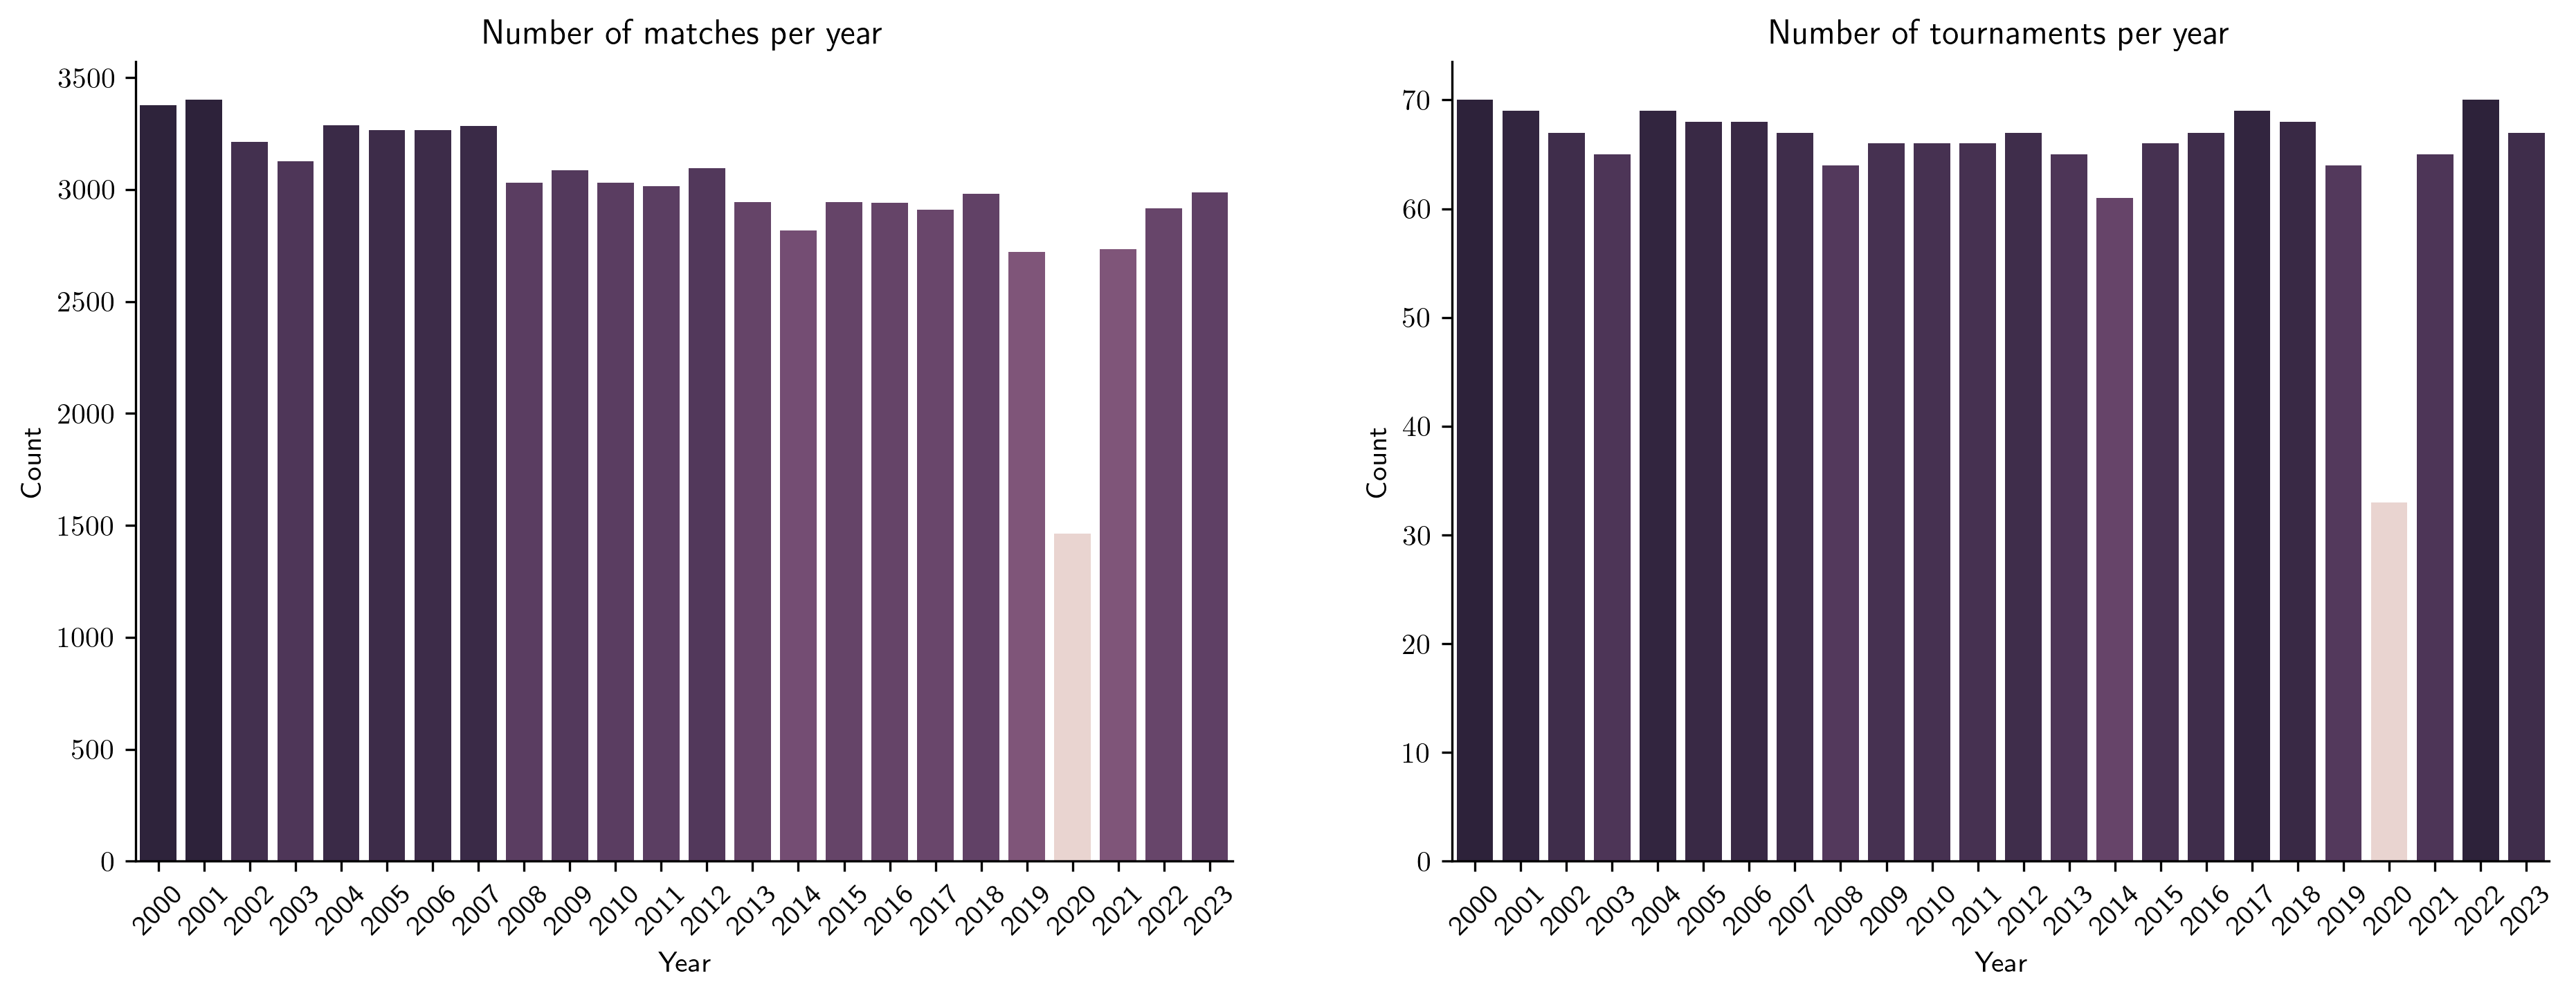

In [10]:
by_year = atp_matches.groupby('year')['tourney_name'].nunique()
matches = atp_matches.groupby('year')['tourney_id'].count()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=matches.index, y=matches.values, ax=ax[0], hue=matches.values, legend=False)
ax[0].set_title("Number of matches per year")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Count")

sns.barplot(x=by_year.index, y=by_year.values, ax=ax[1], hue=by_year.values, legend=False)
ax[1].set_title("Number of tournaments per year")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Count")

plt.show()

Using this data, we can generate the path (i.e., sequence of cities) a player has traveled through over various years. The objective of generating such paths is to calculate the total CO2 emissions for a given year and player. By doing this, we will be able to rank players based on their environmental impact, identifying the most significant contributors to pollution. Paths will be generated based on dates and will be depicted through a textual representation, as follows:

$$
a \to b \to c \to d \to e \to f \to g
$$

To start, let's focus on players who were born after 1975.

In [11]:
print("Number of players before filtering: ", len(players))

players = players.dropna(subset=['dob'])
players['year'] = players['dob'].apply(lambda x: int(str(x)[:4]))
players = players[players['year']> 1980]

print("Number of players after filtering: ", len(players))

display(players)

print("Percentage of null values across the dataset", atp_matches.isnull().mean().mean() * 100)

Number of players before filtering:  64759
Number of players after filtering:  30046


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id,year
643,100644,Alexander,Zverev,R,19970420.0,GER,198.0,Q13990552,1997
2092,102093,Martin,Damm,L,20030930.0,USA,NaN,Q381173,2003
3676,103677,Andreas,Fasching,U,19810101.0,AUT,NaN,Q107721860,1981
3677,103678,Miloslav,Grolmus,R,19810101.0,SVK,NaN,NaN,1981
3678,103679,Jeroen,Masson,R,19810102.0,BEL,NaN,NaN,1981
...,...,...,...,...,...,...,...,...,...
64754,212653,Ryan,Golesworthy,U,20011126.0,GBR,NaN,NaN,2001
64755,212654,Jake,Fellows,U,20020515.0,USA,NaN,NaN,2002
64756,212655,Noah,Hernandez,U,20040502.0,USA,NaN,NaN,2004
64757,212656,Casey,Kania,U,20021002.0,USA,NaN,NaN,2002


Percentage of null values across the dataset 1.2051330346979388


In [12]:
# For each season of each player, generate his tour path.
def generate_path(player_id, year, df) -> str: 
    df = atp_matches[(atp_matches['Wid'] == player_id) | (atp_matches['Lid'] == player_id)]
    df = df[df['year'] == year].sort_values('date')
    cities = df['tourney_name'].unique()
    index = np.argwhere(cities == None)
    cities = np.delete(cities, index)
    path = ", ".join([f"{cities[i]} -> {cities[i+1]}" for i in range(len(cities)-1) if cities[i] != "None" and cities[i+1] != "None"])
    return cities, len(cities), path

def pretty_print(x):
    print("Length: ", x[1])
    print("Path: ", x[2])

# display(atp_matches), 103819 is Roger Federer
pretty_print(generate_path(103819, 2015, atp_matches))
pretty_print(generate_path(103819, 2016, atp_matches))
pretty_print(generate_path(103819, 2017, atp_matches))
pretty_print(generate_path(103819, 2018, atp_matches))
pretty_print(generate_path(103819, 2019, atp_matches))
pretty_print(generate_path(103819, 2021, atp_matches))


Length:  17
Path:  Brisbane -> Melbourne, Melbourne -> Dubai, Dubai -> Indian Wells, Indian Wells -> Monte Carlo, Monte Carlo -> Istanbul, Istanbul -> Madrid, Madrid -> Rome, Rome -> Paris 1, Paris 1 -> Halle, Halle -> London, London -> Cincinnati, Cincinnati -> New York, New York -> Shanghai, Shanghai -> Basel, Basel -> Paris, Paris -> London 2
Length:  7
Path:  Brisbane -> Melbourne, Melbourne -> Monte Carlo, Monte Carlo -> Rome, Rome -> Stuttgart, Stuttgart -> Halle, Halle -> London
Length:  13
Path:  Melbourne -> Dubai, Dubai -> Indian Wells, Indian Wells -> Miami, Miami -> Stuttgart, Stuttgart -> Halle, Halle -> London, London -> Canada, Canada -> New York, New York -> Laver Cup, Laver Cup -> Shanghai, Shanghai -> Basel, Basel -> London 2
Length:  14
Path:  Melbourne -> Rotterdam, Rotterdam -> Indian Wells, Indian Wells -> Miami, Miami -> Stuttgart, Stuttgart -> Halle, Halle -> London, London -> Cincinnati, Cincinnati -> New York, New York -> Laver Cup, Laver Cup -> Shanghai, Shan

In [13]:
def get_top_100(year): 
    rankings_year = rankings[(rankings['date'].dt.year == year)]
    top_100 = rankings_year[rankings_year['rank'] <= 100].sort_values(by=["date"], ascending=False).head(100)
    return top_100.sort_values(by=["rank"])

# Save it to make comparisons later on
for year in range(2000, 2024):
    top_100_21 = get_top_100(year)
    top_100_21['path'] = top_100_21.apply(lambda x: generate_path(x['player'], year, atp_matches)[2], axis=1)
    top_100_21.to_csv(PREPROCESSED + "top_100_" + str(year) + "_with_path.csv", index=False)    

# III. Conclusion

In this analysis, we gain an initial overview of the available data. The data sourced online is of exceptional quality, characterized by a remarkably low incidence of missing values and comprehensive coverage of all the variables necessary for this project. Although there is room for improvement in the data scraped from the web, it is deemed adequate for the purposes of this project.